# Session 9 - Akhilesh Pai #

## Introduction ##

In this notebook I will be using a Fast Fourier Transform to numerically calculate and plot the Fourier coefficients of created functions and of given data sets from audio samples provided.

For the 1st function, a square wave defined by $f(x) = +1$ for $0 \leq x < 0.5$ and $-1$ for $0.5 \leq x < 1$, over a single period. The 2nd function is a single square pulse defined over the region $0\leq x \leq 1000$, with $f(x) = +1$ for $0 \leq x \leq 10$ and $0$ elsewhere. For each of the functions above, I have created an array of Fourier coefficients and plotted on a graph.

The 2nd part of the task is where 3 text files containing data sets for 3 different audio samples, labelled "Sample B", "Sample D", and "Sample G". For each of these 3 audio samples, I have plotted the 1st 2000 points, followed by a plot containing every 500th point, and finally a Fourier transform using only the 1st 10,000 coefficients calculated.

In all of these the Fast Fourier Transform function (np.fft.rfft()) has been used, as this allows for identical results to the Discrete Fourier Transform function defined in the script, however it processes the results much faster.

## Transforms of Basic Functions ##

In [22]:
# following line makes all plot output generate as images within the notebook. 
%matplotlib notebook

#importing required packages and assigning to shorter name for convenience
import numpy as np
import matplotlib.pyplot as plt

### Function 1 ###

In [81]:
# creates array of 100 points, 1st 500 are +1, 2nd 500 are -1
fx = np.concatenate([np.ones(500), -np.ones(500)])

<IPython.core.display.Javascript object>


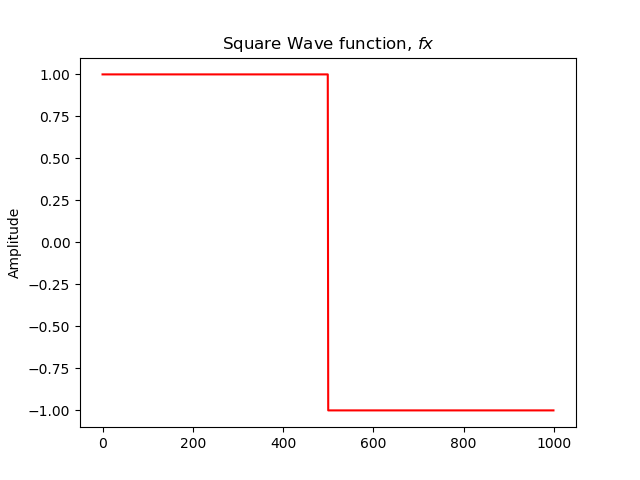

In [83]:
# plots square wave function in red
plt.figure()
plt.plot(fx, 'r') # plots the square wave function in red
plt.title("Square Wave function, $fx$")
plt.ylabel('Amplitude');

<IPython.core.display.Javascript object>


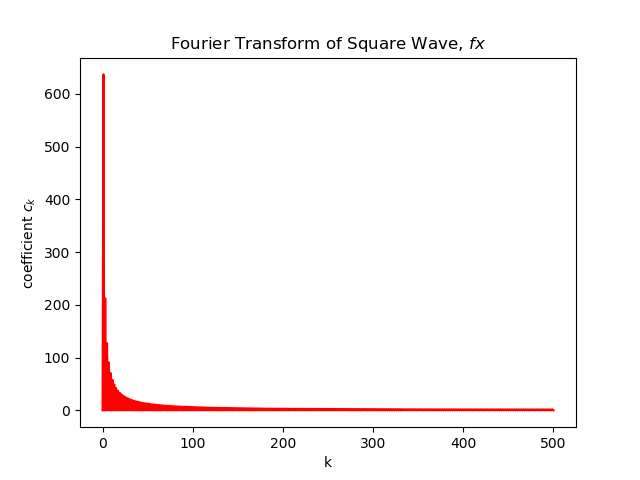

In [71]:
c_fft =  np.fft.rfft(fx) # transforms the array of data

# plots absolute values of discrete Fourier transform coefficients
plt.figure()
plt.plot(abs(c_fft), 'r') # plot the absolute coefficients in red
plt.title("Fourier Transform of Square Wave, $fx$")
plt.xlabel('k')
plt.ylabel('coefficient $c_k$');

### Function 2 ###

In [56]:
# creates array of values defining 2nd function
fx1 = np.concatenate([np.ones(10), -np.zeros(990)])

<IPython.core.display.Javascript object>


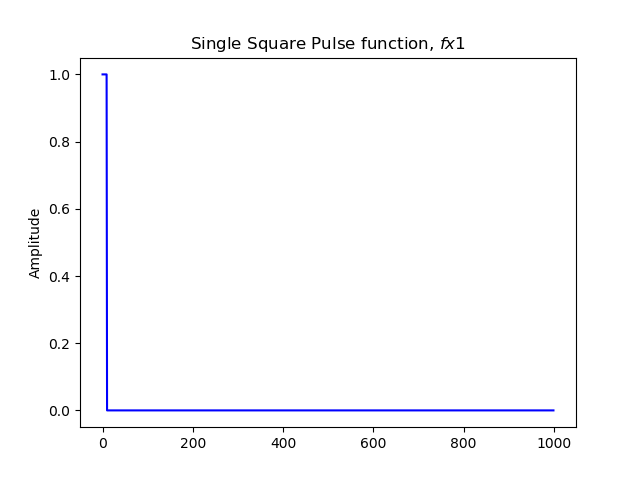

In [85]:
# plots single pulse function in blue
plt.figure()
plt.plot(fx1, 'b') # plots single pulse function in blue
plt.title("Single Square Pulse function, $fx1$")
plt.ylabel('Amplitude');

<IPython.core.display.Javascript object>


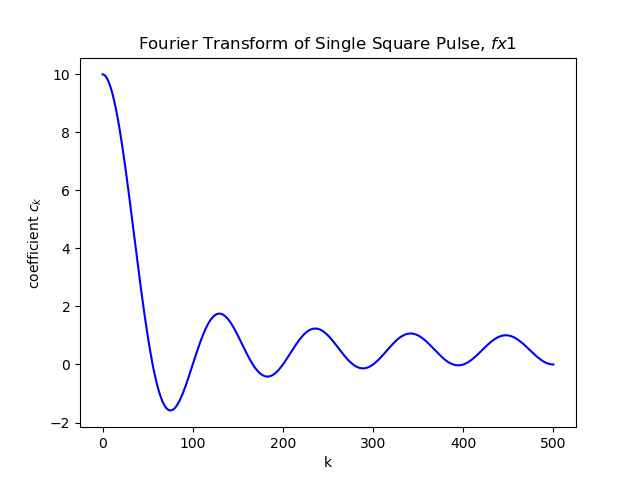

In [86]:
c_fft1 = np.fft.rfft(fx1) # transforms data from 2nd function

# plots real coefficients of discrete Fourier transform
plt.figure()
plt.plot(c_fft1.real, 'b') # plots real coefficients in blue
plt.title("Fourier Transform of Single Square Pulse, $fx1$")
plt.xlabel('k')
plt.ylabel('coefficient $c_k$');

The graph of the Fourier coefficients obtained from the 1st function is expected from a square wave function, as it matches the standard result for a square wave. There are peaks at the low values of $k$ and the amplitude of the peaks decreases exponentially as the value of $k$ increases.

The graph from the 2nd function is also as expected from standard results for a single square pulse. The graph produced from the Fourier transform is a sinc function (sine cardinal).

## Audio Samples ##

In [29]:
# loads 3 audio sample data sets
# each has sampling rate of 44.1kHz
x = np.loadtxt("Sample_B.txt")
y = np.loadtxt("Sample_D.txt")
z = np.loadtxt("Sample_G.txt")

v = 44100 # sampling rate of all audio samples, in HERTZ (Hz)

# creating arrays of first 2000 points of each audio sample
x2k = x[:2000]
y2k = y[:2000]
z2k = z[:2000]

# creates arrays from every 500th point of each data set
x5h = x[::500]
y5h = y[::500]
z5h = z[::500]

In the code cell above I have imported each of the audio samples and assigned them to $x$, $y$, and $z$. Then I created a new constant that is the sampling rate of all the audio samples, which is $44.1kHz$. Then I have used the array selecting feature to create 2 new arrays for each audio sample, first of which is the 1st 2000 points of each data set, and the second being an array of every 500th point of each data set.

### Sample B ###

<IPython.core.display.Javascript object>


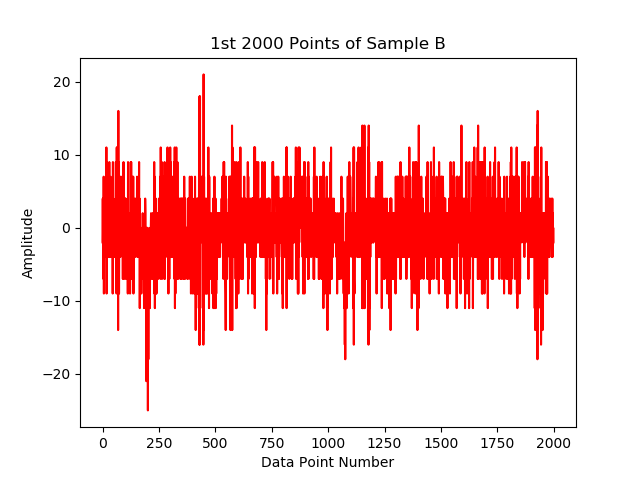

In [50]:
# plots Sample B on graph
plt.figure()
plt.plot(x2k, 'r') # plots 1st 2000 points of Sample B in red
plt.title("1st 2000 Points of Sample B")
plt.xlabel('Data Point Number')
plt.ylabel('Amplitude');

In the code cell above I have plotted the 1st 2000 points of Sample B in red.

<IPython.core.display.Javascript object>


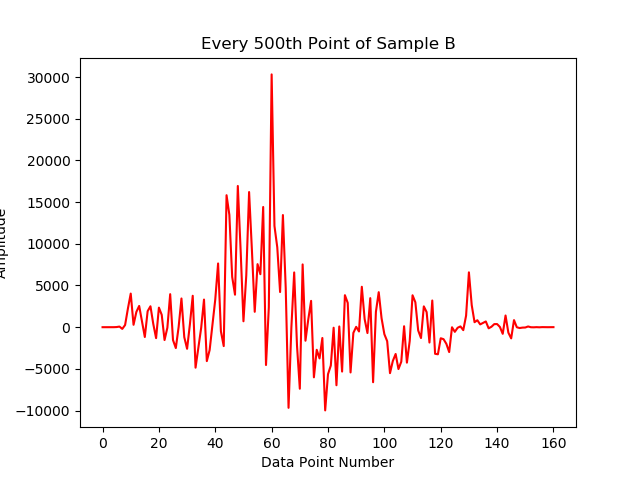

In [53]:
# plots every 500th point of Sample B
plt.figure()
plt.plot(x5h, 'r') # plots every 500th point of Sample B in red
plt.title("Every 500th Point of Sample B")
plt.xlabel('Data Point Number')
plt.ylabel('Amplitude');

In the code cell above I have plotted every 500th point of Sample B in red.

<IPython.core.display.Javascript object>


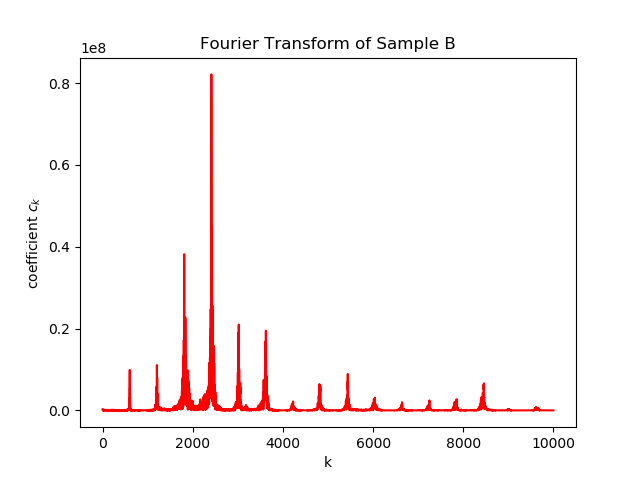

In [39]:
# transforms Sample B data using discrete Fourier transform function
x_fft = np.fft.rfft(x)

# plots absolute values of discrete Fourier transform for Sample B
plt.figure()
plt.plot(abs(x_fft[:10000]), 'r') # plots absolute coefficients in red
plt.title("Fourier Transform of Sample B")
plt.xlabel('k')
plt.ylabel('coefficient $c_k$');

In the code cell above I have calculated an array of Fourier coefficients for Sample B, and subsequently plotted the first 10,000 coefficients. As you can see from the graph, the sound sample consists mostly of low frequencies, indicated by the many peaks towards to left-hand side of the graph. The peak frequency, which has the maximum amplitude is at $k=2413$, which corresponds to a frequency of $f=1322Hz$. Though this audio sample is mostly dominated by low frequencies, there are some higher frequency singals which are shown by the small peaks towards the upper part of the graph (closer to k = 10,000).

In [60]:
# determined by inspection of discrete Fourier transform of each audio sample
# k is the fundamental Fourier coefficient index
kx = 603

# fundamental frequency of audio sample calculated, in HERTZ (Hz)
# from sampling rate (v), fundamental Fourier coefficient index (kx, ky, kz)
# and the number of sampled data points (length of data set)
x_freq = (v*kx)/len(x)

In [61]:
print("The note played by instrument x is", x_freq, "Hz")

The note played by instrument x is 330.3596496676812 Hz


### Sample D ###

<IPython.core.display.Javascript object>


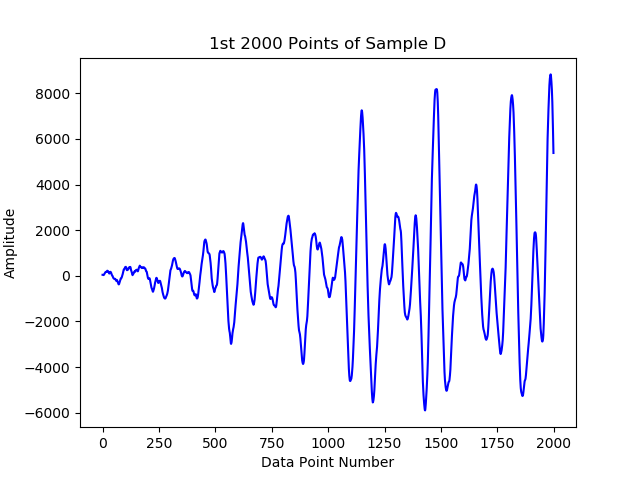

In [52]:
# plots Sample D on graph
plt.figure()
plt.plot(y2k, 'b') # plots 1st 2000 points of Sample D in blue
plt.title("1st 2000 Points of Sample D")
plt.xlabel('Data Point Number')
plt.ylabel('Amplitude');

In the code cell above I have plotted the 1st 2000 points of Sample D in blue.

<IPython.core.display.Javascript object>


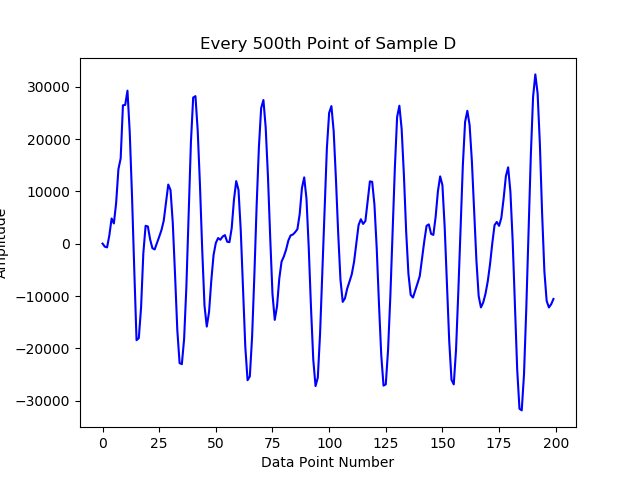

In [54]:
# plots every 500th point of Sample D
plt.figure()
plt.plot(y5h, 'b') # plots every 500th point of Sample D in blue
plt.title("Every 500th Point of Sample D")
plt.xlabel('Data Point Number')
plt.ylabel('Amplitude');

In the code cell above I have plotted every 500th point of Sample D in blue.

<IPython.core.display.Javascript object>


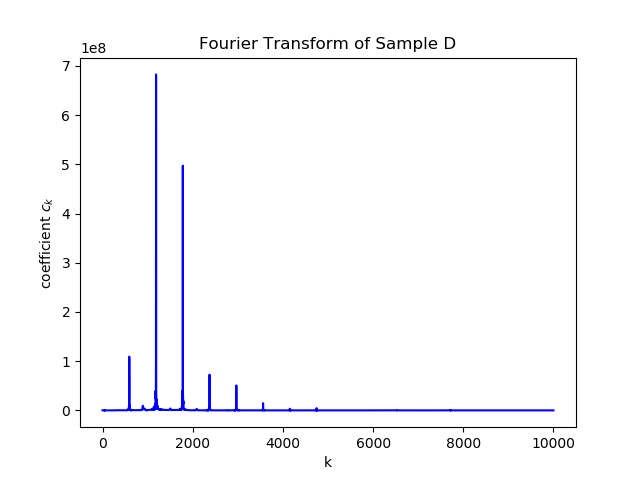

In [40]:
# transforms Sample D data using discrete Fourier transform function
y_fft = np.fft.rfft(y)

# plots absolute values of discrete Fourier transform for Sample D
plt.figure()
plt.plot(abs(y_fft[:10000]), 'b') # plots absolute coefficients in blue
plt.title("Fourier Transform of Sample D")
plt.xlabel('k')
plt.ylabel('coefficient $c_k$');

In the code cell above I have calculated an array of Fourier coefficients for Sample D, and subsequently plotted the first 10,000 coefficients. As you can see from the graph, the sound sample consists almost entirely of low frequencies, indicated by all the peaks towards to left-hand side of the graph. The peak frequency, which has the maximum amplitude is at $k=1187$, which corresponds to a frequency of $f=523Hz$. There are no high frequency signals in this audio sample as there are no peaks higher than $k=4747$, which corresponds to a frequency of $f=2093Hz$. Therefore the highest frequency within this audio sample is $f=2093Hz$.

In [74]:
# determined by inspection of discrete Fourier transform of each audio sample
# k is the fundamental Fourier coefficient index
ky = 593

# fundamental frequency of audio sample calculated, in HERTZ (Hz)
# from sampling rate (v), fundamental Fourier coefficient index (kx, ky, kz)
# and the number of sampled data points (length of data set)
y_freq = (v*ky)/len(y)

In [75]:
print("The note played by instrument y is", y_freq, "Hz")

The note played by instrument y is 261.513 Hz


### Sample G ###

<IPython.core.display.Javascript object>


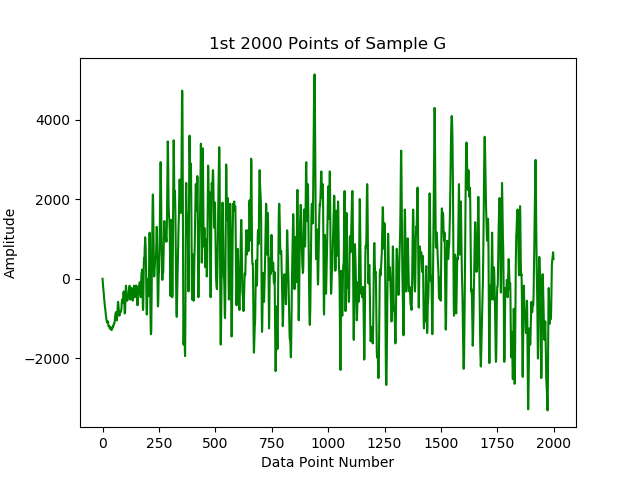

In [51]:
# plots Sample G on graph
plt.figure()
plt.plot(z2k, 'g') # plots 1st 2000 points of audio sample in green
plt.title("1st 2000 Points of Sample G")
plt.xlabel('Data Point Number')
plt.ylabel('Amplitude');

In the code cell above I have plotted the 1st 2000 points of Sample G in green.

<IPython.core.display.Javascript object>


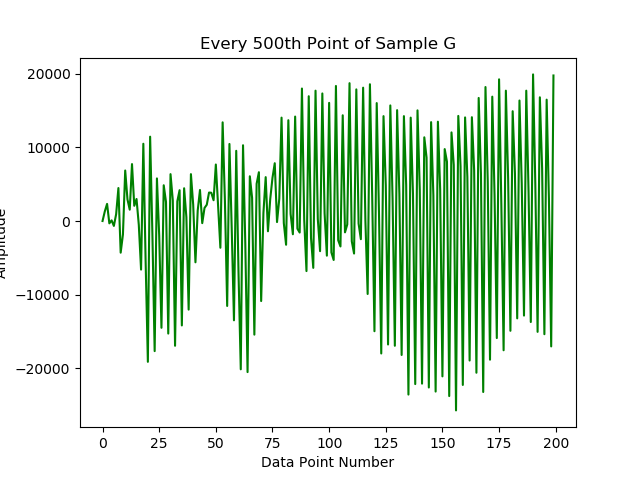

In [55]:
# plots every 500th point of Sample G
plt.figure()
plt.plot(z5h, 'g') # plots every 500th point of audio sample in green
plt.title("Every 500th Point of Sample G")
plt.xlabel('Data Point Number')
plt.ylabel('Amplitude');

In the code cell above I have plotted every 500th point of Sample G in green.

<IPython.core.display.Javascript object>


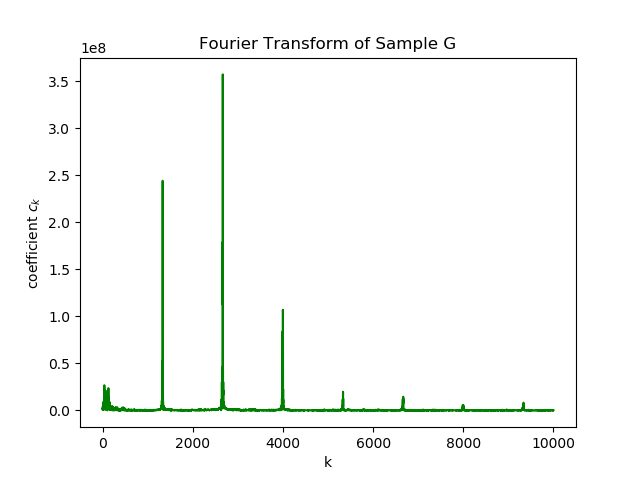

In [41]:
# transforms Sample G data using discrete Fourier transform function
z_fft = np.fft.rfft(z)

# plots absolute values of discrete Fourier transform for Sample G
plt.figure()
plt.plot(abs(z_fft[:10000]), 'g') # plots absolute coefficients in green
plt.title("Fourier Transform of Sample G")
plt.xlabel('k')
plt.ylabel('coefficient $c_k$');

In the code cell above I have calculated an array of Fourier coefficients for Sample G, and subsequently plotted the first 10,000 coefficients. As you can see from the graph, the sound sample consists mostly of low frequencies, indicated by the many peaks towards to left-hand side of the graph. The peak frequency, which has the maximum amplitude is at $k=2666$, which corresponds to a frequency of $f=1176Hz$. At the bottom of the graph (around k = 0), there appears to be a peak, however on closer inspection it is does appear to be noise with not discernable pattern or main peak. This suggests that this audio sample contains low frequency noise or interference of some sort (low pitch noise).

In [68]:
# determined by inspection of discrete Fourier transform of each audio sample
# k is the fundamental Fourier coefficient index
kz = 1333

# fundamental frequency of audio sample calculated, in HERTZ (Hz)
# from sampling rate (v), fundamental Fourier coefficient index (kx, ky, kz)
# and the number of sampled data points (length of data set)
z_freq = (v*kz)/len(z)

In [69]:
print("The note played by instrument z is", z_freq, "Hz")

The note played by instrument z is 587.853 Hz


## Conclusion ##

In this notebook I have created 2 functions which have been Fourier transformed and plotted. Then 3 audio samples where Fourier transformed and subsequently plotted on graphs, and then the fundamental Fourier coefficient index was found for each audio sample by finding the lowest $k$ value for which a true peak existed. Then these values of $k$ were inserted into the equation $ f = \frac{\nu k}{N} $, where $\nu$ is the sampling rate of the audio samples, which is given as $44.1kHz$, and $N$ is the number of sampled data points.